# STOR 566, Homework 1
### Instructor: Yao Li
### Keywords: optimization
### Due date: Sep 07, 11:55pm
### **Submission Instruction**

- Please download this script and use it to answer the questions in the homework. 
- For submission, please include your code, code output and answers in the script and submit the ipynb file on sakai.
- Please don't modify existing cells. But you can add cells between the exercise statements.
- To make markdown, please switch the cell type to markdown (from code) - you can hit 'm' when you are in command mode - and use the markdown language. For a brief tutorial see: https://daringfireball.net/projects/markdown/syntax


## Problem 1 (10 points)

Prove whether the following functions are convex or not.
- (a) (5 points) $f(x_1,x_2)=(x_1x_2-1)^2$, where $x_1, x_2\in \mathbb{R}$.
- (b) (5 points) $f(\mathbf{w}_1, \mathbf{w}_2)=\|\mathbf{w}_1-\mathbf{w}_2\|^2_2$,  where $\mathbf{w}_1, \mathbf{w}_2\in \mathbb{R}^2$.


Solution of Problem 1 (a): $f(x_1, x_2)$ aren't convex.

Answer:

$f(x_1, x_2) = (x_1x_2 - 1)^2$ with $x_1, x_2 \in\mathbb{R}$\
\
$f(x_1, x_2) = (x_1x_2 - 1)^2 = x_1^2x_2^2 - 2x_1x_2 + 1$\
\
$ \nabla^2 f(x_1, x_2) =
\begin{bmatrix}
2x_2^2 & 4x_1x_2 - 2\\
4x_1x_2 - 2 & 2x_1^2
\end{bmatrix}
$\
\
$det(\nabla^2 f(x_1, x_2)) = -12x_1^2x_2^2 + 16x_1x_2 - 4 = -4(-x_1x_2 + 1)(-3x_1x_2 + 1)$\
\
When $x_1 = 0, x_2 = 0, det(\nabla^2 f(x_1, x_2)) = -4 < 0$\
\
Thus, $\nabla^2 f(x_1, x_2)$ is not positive definite.\
\
Thus, $f(x_1, x_2)$ aren't convex.

Solution of Problem 1 (b):

Answer:

## Problem 2 (10 points)

Identify stationary points for $f(x) = 2x_1 +12x_2 +x^2_1 -3x^2_2$? Are they local minimum/maximum; global minimum/maximum or saddle points? Why?

Answer:\
$f(x) = 2x_1 + 12x_2 + x_1^2 - 3x_2^2$\
\
$f_{x_1} = 2 + 2x_1$ $\>$ $f_{x_1x_1} = 2$ $\>$ $f_{x_2} = 12 - 6x_2$ $\>$ $f_{x_2x_2} = -6$ $\>$ $f_{x_1x_2} = 0$\
\
In order to find the stationary points, solve the following system of equations:\
$\begin{array}{lcl} 0 & = & 2 + 2x_1 \\ 0 & = & 12 - 6x_2 \end{array}$\
Solution:\
$\begin{array}{lcl} x_1 & = & -1 \\ x_2 & = & 2 \end{array}$\
\
The system of equation only has one solution and the domain of the function is unbounded. Thus, there is only one stationary point:\
$(-1, 2)$\
\
In order to identify whether it's minimum/maximum or saddle points, we calculate the determinant of the Hassian matrix(H) of the function:\
$ H = 
\begin{bmatrix}
f_{x_1x_1} & f_{x_1x_2}\\
f_{x_2x_1} & f_{x_2x_2}
\end{bmatrix}$\
\
$det(H) = f_{x_1x_1} * f_{x_2x_2} - f_{x_1x_2}^2 = 2 * (-6) - 0^2 = -12 < 0$\
\
Thus, it's a saddle point.

## Problem 3 (80 points)

Given training data $\{\mathbf{x}_i, y_i\}^n_{i=1}$, each $x_i\in \mathbb{R}^d$ and $y_i \in \{+1, -1\}$, we try to solve the following logistic regression problem by gradient descent:
\begin{align}
\min_{\mathbf{w}\in R^d}\left\{\frac{1}{n}\sum_{i=1}^n\log(1+e^{-y_i\mathbf{w}^T\mathbf{x}_i})+\frac{1}{2}\|\mathbf{w}\|^2_2  \right\} := f(\mathbf{w}).
\end{align}
Test the algorithm using the 'heart scale' dataset with $n = 270$ and $d = 13$: the matrix $\mathbf{X}$ is stored in the file 'X$\_$heart', and the vector $\mathbf{y}$ is stored in the file 'y$\_$heart'. ('X$\_$heart' contains $n$ lines, each line stores a vector $\mathbf{x}_i$ with $d$ real numbers. 'y$\_$heart' contains the $\mathbf{y}$ vector.)

In [1]:
## Please implement data loading yourself

In [1]:
## Load data:
import numpy as np

def _load(path):
    with open(path, "r") as f:
        lines = f.readlines()
    ret = []
    for line in lines:
        if line != "":
            ret.append([float(t.strip()) for t in line.split()])
    return np.array(ret)


def load_data(X_path, Y_path):
    x = _load(X_path)
    y = _load(Y_path)
    return x, y


X, Y = load_data("DATA/X_heart", "DATA/y_heart")
X.shape()
Y.shape()


FileNotFoundError: [Errno 2] No such file or directory: 'DATA/X_heart'

### (a) (5 points) Compute the gradient of $f(\mathbf{w})$ w.r.t. $\mathbf{w}$.

In [16]:
def propagate(W, X, Y):
    N = len(X)
    ret = 0
    for i in range(N):
        t = 1 + np.exp(-Y[i][0] * (W.T.dot(X[i]).item()))
        t = np.log(t)
        ret += t
    ret /= N
    ret += np.linalg.norm(W) * np.linalg.norm(W) / 2
    return ret


def grad(W, X, Y):
    N = len(X)
    ret = np.zeros((X.shape[1],))
    for i in range(N):
        t = Y[i][0] * X[i]
        t /= (Y[i][0] * (W.T.dot(X[i])))
        t += 1
        ret += t
    ret /= N
    return ret.reshape((X.shape[1], 1))


def output_grad():
    W = np.random.random((13, 1))
    print(propagate(W, X, Y))
    print(grad(W, X, Y))


output_grad()

2.4948216087629738
[[  74.44205879]
 [-134.13400885]
 [-134.47238233]
 [  95.63451398]
 [ 111.24655068]
 [ 136.90128921]
 [-134.37722598]
 [  47.54493988]
 [-134.47454127]
 [  49.14460639]
 [   0.90957822]
 [ 136.96201482]
 [-134.55754988]]


Answer:

### (b) (30 points) Implement the gradient descent algorithm with a fixed step size $\eta$. Find a small $\eta_1$ such that the algorithm converges. Increase the step size to $\eta_2$ so the algorithm cannot converge. Run 50 iterations and plot the iteration versus $\log(f(\mathbf{w}^k) -f(\mathbf{w}^*))$ plot for $\eta_1$ and $\eta_2$. In practice it is impossible to get the exact optimal solution $\mathbf{w}^*$, so use the minimum value you computed as $f(\mathbf{w}^*)$ when you plot the figure. Report the $f(\mathbf{w}^*)$ value you used for generating the plots.

In [4]:
## Implementation of GD
## You can insert more code chunks and text cells between (b) and (c) if you want to.
## Your code:

def GD(W, X, Y, step_size, rnd=50):
    errs = []
    for i in range(rnd):
        W -= step_size * grad(W, X, Y)
        errs.append(propagate(W, X, Y))
    return np.array(errs)

In [5]:
# W = np.random.random((13, 1))
W = np.array([[0.03439414],
       [0.81652136],
       [0.72424916],
       [0.67671307],
       [0.24824191],
       [0.03997214],
       [0.07705192],
       [0.51915   ],
       [0.62479985],
       [0.92979203],
       [0.91737564],
       [0.69525569],
       [0.46987825]])
step_0_001 = GD(W.copy(), X, Y, 0.001)
step_0_01 = GD(W.copy(), X, Y, 0.01)


min_v = np.min([step_0_01, step_0_001])
step_0_001 -= min_v
step_0_01 -= min_v

In [6]:
import matplotlib.pyplot as plt


def draw(Y):
    plt.close("all")

    plt.figure(figsize=(8, 6))

    X = list(range(len(Y)))
    plt.plot(X, Y)

    plt.grid()
    plt.show()

Plot of a small step size $\eta_1$:

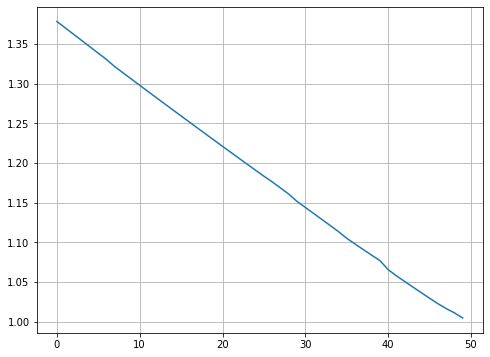

In [7]:
draw(step_0_001)

Plot of a small step size $\eta_2$:

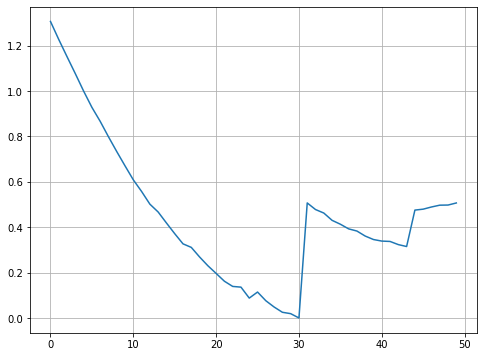

In [8]:
draw(step_0_01)

The $f(\mathbf{x}^*)$ value used is:

In [9]:
min_v

1.457828022225954

### (c) (5 points) Write down the pseudo code of gradient descent with backtracking line search ($\sigma=0.01$).

Pseudo code:

### (d) (20 points) Implement the gradient descent algorithm with backtracking line search ($\sigma=0.01$). Plot the same iteration versus $\log(f(\mathbf{w}^k) -f(\mathbf{w}^*))$ plot.

In [10]:
## Implementation of GD with line search
## You can insert more code chunks and text cells between (d) and (e) if you want to.
## Your code:

def BLS_GD(W, X, Y, step_size, rnd=50, a=0.01):

    def check(step_size_, d_):
        new_e = propagate(W + step_size_ * d_, X, Y)
        e = propagate(W, X, Y) + a * step_size_ * ((-d_).T.dot(d))
        return new_e <= e

    errs = []
    for i in range(rnd):
        d = -grad(W, X, Y)
        step_size_ = step_size
        while True:
            if check(step_size_, d):
                break
            step_size_ /= 2
        W += step_size_ * d
        errs.append(propagate(W, X, Y))
    return np.array(errs)

The Plot:

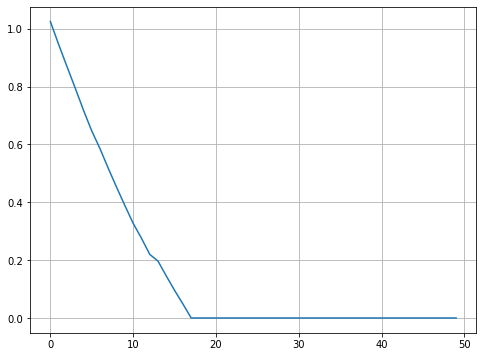

In [11]:
BLS_step_0_01 = BLS_GD(W.copy(), X, Y, 0.01)
BLS_min_v = np.min(BLS_step_0_01)
BLS_step_0_01 -= BLS_min_v
draw(BLS_step_0_01)

### (e) (20 points) Test your implementation (gradient descent with backtracking line search) on a larger dataset 'epsilonsubset'. Plot the same iteration vs error plot.

In [12]:
## Implementation of GD with line search
## You can insert more code chunks and text cells between (d) and (e) if you want to.
## Your code:

Large_X, Large_Y = load_data("DATA/x_epsilonsubset", "DATA/y_epsilonsubset")
Large_W = np.random.random((2000, 1))

Large_step_0_01 = BLS_GD(Large_W, Large_X, Large_Y, 0.001)
Large_min_v = np.min(Large_step_0_01)
Large_step_0_01 -= Large_min_v
draw(Large_step_0_01)

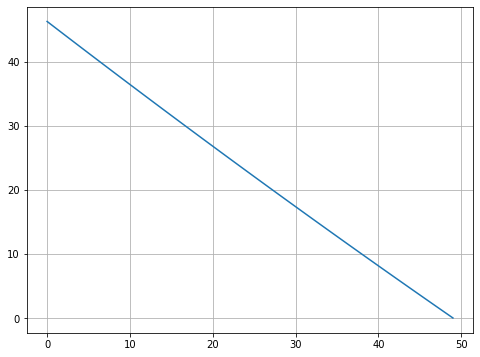

The Plot: